In [1]:
import mne
import os.path as op
import numpy as np
from numpy.random import randn

In [2]:
from mne import io, read_epochs, Epochs, read_evokeds, combine_evoked 
from mne.epochs import equalize_epoch_counts

In [3]:
print ('The mne version is:', mne.__version__)

The mne version is: 0.19.2


In [4]:
# Load all modules..
import pickle
import numpy as np
from scipy.io import loadmat
from scipy import stats
from copy import deepcopy
import seaborn as sns
import os.path
import matplotlib
import matplotlib.pylab as pylab
import pandas as pd
import sys

In [5]:
from scipy import stats as stats
from scipy.io import loadmat
from copy import deepcopy
from mne.stats import ttest_1samp_no_p
from mne.stats import (spatio_temporal_cluster_1samp_test,
                       permutation_cluster_1samp_test,
                       summarize_clusters_stc)

In [6]:
from matplotlib.pylab import *
import pylab as pl

In [7]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [8]:
label_fontsize = 16
title_fontsize = 16

In [9]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [10]:
sns.set(font_scale=1.25, style="whitegrid")

In [11]:
#for visualization..
import os
os.environ['ETS_TOOLKIT'] = 'qt4'
os.environ['QT_API'] = 'pyqt5'
from pyface.qt import QtGui, QtCore

In [12]:
from mayavi import mlab
%gui qt

In [13]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [14]:
basefolderpath = "/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/"
output_dir = 'decAlertnessDecisionmaking_JNeuroscience2021/Figures/'

In [15]:
fig_dir = basefolderpath + output_dir
fig_dir

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decArsousalDecisionmaking_JNeuroscience2021/Figures/'

In [16]:
subject = 'ICBM152_subj'
subjects_dir = basefolderpath + 'Scripts/toolboxes/freesurfer/freesurfer_subj/'
mne.set_config('SUBJECTS_DIR',subjects_dir,set_env=True)
subjects_dir = mne.get_config('SUBJECTS_DIR')
print(subjects_dir)

/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/Scripts/toolboxes/freesurfer/freesurfer_subj/


In [17]:
bem_dir = op.join(subjects_dir, subject, 'bem')
print(bem_dir)
trans_fname = basefolderpath + 'decAlertnessDecisionmaking_JNeuroscience2021/sourcerecon/' + subject + '-trans.fif'

/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/Scripts/toolboxes/freesurfer/freesurfer_subj/ICBM152_subj/bem


In [18]:
bem_dir = op.join(subjects_dir, subject, 'bem')
src_fname = op.join(bem_dir, subject + '-oct-6-src.fif')
bem_sol_fname = op.join(bem_dir, subject + '-5120-bem-sol.fif')

print(' transformation file:' + trans_fname)
print(' source directory:' + src_fname)
print( ' bem sol_filename:' + bem_sol_fname)

 transformation file:/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decArsousalDecisionmaking_JNeuroscience2021/sourcerecon/ICBM152_subj-trans.fif
 source directory:/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/Scripts/toolboxes/freesurfer/freesurfer_subj/ICBM152_subj/bem/ICBM152_subj-oct-6-src.fif
 bem sol_filename:/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/Scripts/toolboxes/freesurfer/freesurfer_subj/ICBM152_subj/bem/ICBM152_subj-5120-bem-sol.fif


In [19]:
trans = mne.read_trans(trans_fname)
src = mne.read_source_spaces(src_fname)
bem = mne.read_bem_solution(bem_sol_fname)

    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
Loading surfaces...
Three-layer model surfaces loaded.

Loading the solution matrix...

Loaded linear_collocation BEM solution from /rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/Scripts/toolboxes/freesurfer/freesurfer_subj/ICBM152_subj/bem/ICBM152_subj-5120-bem-sol.fif


In [20]:
elec_fileloc = basefolderpath + 'decAlertnessDecisionmaking_JNeuroscience2021/sourcerecon/'
elec_filename = 'GSN-HydroCel-92.sfp'
fname = elec_fileloc + elec_filename
montage = mne.channels.read_custom_montage(fname)

#### For using only specific ROIs later on in cluster permuation tests and morphing to fsaverage space..

In [21]:
all_labels = mne.read_labels_from_annot('fsaverage', 'aparc',subjects_dir=subjects_dir) 

Reading labels from parcellation...
   read 35 labels from /rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/Scripts/toolboxes/freesurfer/freesurfer_subj/fsaverage/label/lh.aparc.annot
   read 34 labels from /rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/Scripts/toolboxes/freesurfer/freesurfer_subj/fsaverage/label/rh.aparc.annot


In [22]:
fsaverage_vertices = [np.arange(10242), np.arange(10242)]

In [23]:
len(np.in1d(fsaverage_vertices[0], all_labels[0].vertices))

10242

In [24]:
frontal = ['superiorfrontal','rostralmiddlefrontal','caudalmiddlefrontal','parsopercularis',
           'parsorbitalis','parstriangularis','lateralorbitofrontal','medialorbitofrontal',
            'precentral','paracentral','frontalpole']
parietal = ['superiorparietal','inferiorparietal','supramarginal','postcentral','precuneus']
temporal = ['superiortemporal','middletemporal','inferiortemporal','bankssts','fusiform',
            'transversetemporal','entorhinal','temporalpole','parahippocampal']
occipital = ['lateraloccipital','lingual','cuneus','pericalcarine']
other = ['insula']

In [25]:
include_rois = np.array(frontal + parietal + temporal+ occipital + other)
roi_lh = np.core.defchararray.add(include_rois, '-lh')
roi_rh = np.core.defchararray.add(include_rois, '-rh')

In [26]:
include_lh = np.zeros((1, 10242), dtype=bool)
include_rh = np.zeros((1, 10242), dtype=bool)
for labelidx in range(0,len(all_labels)):
    if all_labels[labelidx].name in roi_lh: #labelidx % 2 != 0,all_labels[labelidx].name == 'inferiortemporal-lh':
        print('ROI included: ', all_labels[labelidx].name)
        #print('labelidx: ', labelidx)
        include_lh = (np.in1d(fsaverage_vertices[0], all_labels[labelidx].vertices) | include_lh)
    elif all_labels[labelidx].name in roi_rh: #all_labels[labelidx].name == 'inferiortemporal-rh'
        print('ROI included: ', all_labels[labelidx].name)
        #print('labelidx: ', labelidx)
        include_rh = (np.in1d(fsaverage_vertices[1], all_labels[labelidx].vertices) | include_rh)
        
exclude_lh = 1*(~include_lh)
exclude_rh = 1*(~include_rh)

ROI included:  bankssts-lh
ROI included:  bankssts-rh
ROI included:  caudalmiddlefrontal-lh
ROI included:  caudalmiddlefrontal-rh
ROI included:  cuneus-lh
ROI included:  cuneus-rh
ROI included:  entorhinal-lh
ROI included:  entorhinal-rh
ROI included:  frontalpole-lh
ROI included:  frontalpole-rh
ROI included:  fusiform-lh
ROI included:  fusiform-rh
ROI included:  inferiorparietal-lh
ROI included:  inferiorparietal-rh
ROI included:  inferiortemporal-lh
ROI included:  inferiortemporal-rh
ROI included:  insula-lh
ROI included:  insula-rh
ROI included:  lateraloccipital-lh
ROI included:  lateraloccipital-rh
ROI included:  lateralorbitofrontal-lh
ROI included:  lateralorbitofrontal-rh
ROI included:  lingual-lh
ROI included:  lingual-rh
ROI included:  medialorbitofrontal-lh
ROI included:  medialorbitofrontal-rh
ROI included:  middletemporal-lh
ROI included:  middletemporal-rh
ROI included:  paracentral-lh
ROI included:  paracentral-rh
ROI included:  parahippocampal-lh
ROI included:  parahip

In [27]:
print('Included points in lh: ', np.where(include_lh)[0].shape[0])
print('Included points in rh: ', np.where(include_rh)[0].shape[0])

Included points in lh:  8839
Included points in rh:  8871


In [28]:
print('Excluded points in lh: ', np.where(exclude_lh)[0].shape[0])
print('Excluded points in rh: ', np.where(exclude_rh)[0].shape[0])

Excluded points in lh:  1403
Excluded points in rh:  1371


In [29]:
vertexclude_rh = (np.where(exclude_rh)[1] + len(fsaverage_vertices[0]))
vertexclude_rh

array([10252, 10258, 10268, ..., 20206, 20207, 20208])

In [30]:
vertexclude_lh = np.where(exclude_lh)[1]
vertexclude_lh

array([    8,    23,    35, ..., 10221, 10222, 10223])

In [31]:
spatial_exclude = np.concatenate([vertexclude_lh, vertexclude_rh])
len(spatial_exclude)

2774

In [32]:
np.unique(spatial_exclude).shape

(2774,)

In [33]:
fsave_vertices = [np.arange(10242), np.arange(10242)]

In [34]:
morph_mat = mne.compute_source_morph(src = src, subject_from = 'ICBM152_subj', subject_to = 'fsaverage', 
                         subjects_dir = subjects_dir, spacing = fsave_vertices, smooth = 20).morph_mat

In [35]:
# compute connectivity to use in cluster permutation later..
connectivity = mne.spatial_tris_connectivity(mne.grade_to_tris(5))

-- number of connected vertices : 20484


In [36]:
brain_cmap = 'Spectral_r'

In [37]:
def _sourceestimatepattern(raw_fname, subjs, montage, trans, src, bem):
        # Provides source estimate for a given fif file..
    raw = mne.read_epochs(raw_fname)
    raw.set_montage(montage)
    
    fwd = mne.make_forward_solution(raw.info, trans=trans, src=src, bem=bem,
                                meg=False, eeg=True, mindist=5.0, n_jobs=2)
    
    # Compute regularized noise and data covariances
    tmin= -0.15
    noise_cov = mne.compute_covariance(raw, tmin=tmin, tmax=0, method = 'shrunk')
    noise_cov = mne.cov.regularize(noise_cov, raw.info)
    
    inverse_operator = mne.minimum_norm.make_inverse_operator(raw.info, fwd, noise_cov, loose=0.2)
    
    raw, _ = mne.set_eeg_reference(raw, 'average', projection=True)
    
    snr = 3
    lambda2 = 1.0 / snr ** 2
    method = 'MNE'
    # Compute inverse solution on selected epochs(here subjects)..
    
    stc = []
    for rawidx in range(len(subjs)):
        print('Processing subject#', subjs[rawidx])
        tempsubj = subjs[rawidx]
        evoked = raw[tempsubj].average()
        stc_temp = mne.minimum_norm.apply_inverse(evoked, inverse_operator, lambda2, method, pick_ori= 'normal')
        stc.append(stc_temp)
    
    return stc

In [38]:
def screenshotcrop(screenshot):
    
    nonwhite_pix = (screenshot != 255).any(-1)
    nonwhite_row = nonwhite_pix.any(1)
    nonwhite_col = nonwhite_pix.any(0)
    cropped_screenshot = screenshot[nonwhite_row][:, nonwhite_col]
    
    return cropped_screenshot  

In [39]:
def brainplot(stc, clim = dict(kind='value', pos_lims=[0, 1, 40]),title = None, plotview = 'Outer'):
    
    if plotview == 'Outer':
        show = 'lat' 
    else:
        show = 'medial'
    
    #lateral view(lh)..
    brain = stc.plot(views=[show], hemi='lh', size=(800, 1200), subject='fsaverage',
                     subjects_dir=subjects_dir, initial_time=0.00,smoothing_steps=5, time_label = None,
                     background='w', foreground='black', colorbar=False,colormap = brain_cmap,
                     clim=clim)
    screenshot1 = brain.screenshot_single()
    brain.close()
    cropped_screenshot1 = screenshotcrop(screenshot1)
    
    #dorsal view..
    brain = stc.plot(views=['dorsal'], hemi='both', size=(800, 1200), subject='fsaverage',
                     subjects_dir=subjects_dir, initial_time=0.00,smoothing_steps=5, time_label = None,
                     background='w', foreground='black', colorbar=False,colormap = brain_cmap,
                     clim=clim)
    brain.show_view(roll=0, distance=None)
    screenshot2 = brain.screenshot_single()
    brain.close()
    cropped_screenshot2 = screenshotcrop(screenshot2)
    
    #lateral view(rh)..
    brain = stc.plot(views=[show], hemi='rh', size=(800, 1200), subject='fsaverage',
                     subjects_dir=subjects_dir, initial_time=0.00,smoothing_steps=5, time_label = None,
                     background='w', foreground='black', colorbar=False,colormap = brain_cmap,
                     clim=clim)
    screenshot3 = brain.screenshot_single()
    brain.close()
    cropped_screenshot3 = screenshotcrop(screenshot3)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4.))

    # now add the brain to the lower axes
    axes[0].imshow(cropped_screenshot1)
    axes[1].imshow(cropped_screenshot3)
    axes[0].axis('off')
    axes[1].axis('off')
    
    p0 = axes[0].get_position().get_points().flatten()
    p1 = axes[1].get_position().get_points().flatten()

    # add a vertical colorbar with the same properties as the 3D one
    
        
    cax = fig.add_axes([p0[0]+p0[0], 0, p1[2]/2-p0[0]/2, 0.05])
    cbar = mne.viz.plot_brain_colorbar(cax, colormap = brain_cmap, clim = clim,
                                       orientation = 'horizontal')
    cax.set_xlabel('Activity',ha='center', fontweight = 'heavy')
        
    if 'lims' in clim:
        cbarticks = clim['lims']
        cbar.set_ticks(cbarticks)
        cbarticks = [format(cbarticks[0], '.0e'),format(cbarticks[1], '.0e'),format(cbarticks[2], '.0e')]
        cbar.set_ticklabels(cbarticks)
    else:
        cbarticks = clim['pos_lims']
        cbar.set_ticks([-cbarticks[2],-cbarticks[1], cbarticks[1], cbarticks[2]])
        cbar.set_ticklabels([-cbarticks[2],-cbarticks[1], cbarticks[1], cbarticks[2]])
        
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.1)
     
    return axes, fig

In [40]:
def estimateclusters(crop_tmin, crop_tmax):
    
    #crop time periods first..
    stc_cond1 = []
    stc_cond2 = []
    for stcidx in range(len(stc_allcond1)):
        #print('Processing file#', stcidx)
        stc_temp = stc_allcond1[stcidx].copy()
        stc_temp.crop(crop_tmin, crop_tmax)  #to speed things up..
        stc_cond1.append(stc_temp)
        stc_temp = stc_allcond2[stcidx].copy()
        stc_temp.crop(crop_tmin, crop_tmax)  #to speed things up..
        stc_cond2.append(stc_temp)
        
    print('cluster time periods are:',stc_cond1[stcidx].times)
    
    #gather data of the two conditions..
    tempdatashape = stc_cond1[0].data.shape
    n_tpts = tempdatashape[1]
    n_epochs = len(stc_cond1)
    n_channels = tempdatashape[0]
    cond1_data = np.empty([n_epochs, n_channels, n_tpts])
    cond2_data = np.empty([n_epochs, n_channels, n_tpts])
    for idx in range(n_epochs):
        cond1_data[idx,:,:] = stc_cond1[idx].data
        cond2_data[idx,:,:] = stc_cond2[idx].data
        
    n_vertices_sample = n_channels
    n_subjects = len(cond1_data)
    n_times = n_tpts
    
    cond1_data = np.transpose(cond1_data, (1, 2, 0))
    cond2_data = np.transpose(cond2_data, (1, 2, 0))
    
    X = randn(n_vertices_sample, n_times, n_subjects, 2) * 10
    
    X[:, :, :, 0] = cond1_data
    X[:, :, :, 1] = cond2_data
    
    n_vertices_fsave = morph_mat.shape[0]
    
    X = X.reshape(n_vertices_sample, n_times * n_subjects * 2)
    print('Morphing data.')
    X = morph_mat.dot(X)  # morph_mat is a sparse matrix
    X = X.reshape(n_vertices_fsave, n_times, n_subjects, 2)

    fsavgdata_cond1 = X[:, :, :, 0]
    fsavgdata_cond2 = X[:, :, :, 1]


    X = X[:, :, :, 0] - X[:, :, :, 1]  # make paired contrast 
    
    fsavgdata_cond1 = np.mean(fsavgdata_cond1, axis = 2)
    fsavgdata_cond2 = np.mean(fsavgdata_cond2, axis = 2)
    print('Cond1 data: ' ,fsavgdata_cond1.shape)
    print('Cond2 data: ' ,fsavgdata_cond2.shape)
    stc_plotcond1 = stc_cond1[0].copy()
    stc_plotcond2 = stc_cond2[0].copy()
    
    
    morph = mne.compute_source_morph(stc_plotcond1, subject_from='ICBM152_subj',
                                     subject_to='fsaverage',
                                     subjects_dir=subjects_dir)
    stc_plotfsavgcond1 = morph.apply(stc_plotcond1)
    stc_plotfsavgcond1.data = fsavgdata_cond1
    stc_plotfsavgcond1 = stc_plotfsavgcond1.mean()
    morph = mne.compute_source_morph(stc_plotcond2, subject_from='ICBM152_subj',
                                     subject_to='fsaverage',
                                     subjects_dir=subjects_dir)
    stc_plotfsavgcond2 = morph.apply(stc_plotcond2)
    stc_plotfsavgcond2.data = fsavgdata_cond2
    stc_plotfsavgcond2 = stc_plotfsavgcond2.mean()
    
    return stc_plotfsavgcond1,stc_plotfsavgcond2,n_subjects, stc_cond1, stc_cond2, X 

In [41]:
outputfolder = basefolderpath + "decAlertnessDecisionmaking_JNeuroscience2021/Results/results_hddmRegression/"

In [42]:
subjects = ['02','04','05','06','07','09','10','20','21','22',\
            '23','24','25','26','27','28','30','31','33',\
            '35','36','37','38','39','41','42','43','44',\
            '45','46'] #'32','34', these subjects are not used in classifier analysis,hence ignored here aswell..

## Source patterns comparison: Alert regression vs Drowsy regression

In [43]:
subjs_fnames = list()
for s, subject in enumerate(subjects):  # Loop across each subject
    fnamepath1 = outputfolder + 'patterns/' + subject + "_" + "awake_patterns_driftrateregression" + "_ave.fif"
    fnamepath2 = outputfolder + 'patterns/' + subject + "_" + "drowsy_patterns_driftrateregression" + "_ave.fif"
    if os.path.isfile(fnamepath1) and os.path.isfile(fnamepath2):
        subjs_fnames.append(str(int(subject)))

In [44]:
len(subjs_fnames)

30

In [45]:
raw_fname = outputfolder + 'patterns/' + 'awake_patterns_leftright_epo.fif'
stc_allcond1 = _sourceestimatepattern(raw_fname, subjs_fnames, montage, trans, src, bem)

Reading /rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decArsousalDecisionmaking_JNeuroscience2021/Results/results_hddmRegression/patterns/awake_patterns_leftright_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -150.00 ...     800.00 ms
        0 CTF compensation matrices available
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Source space          : <SourceSpaces: [<surface (lh), n_vertices=152723, n_used=4098, coordinate_frame=MRI (surface RAS)>, <surface (rh), n_vertices=154594, n_used=4098, coordinate_frame=MRI (surface RAS)>]>
MRI -> head transform : instance of Transform
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    Skipping interior check for 2213 sources that fit inside a sphere of radius   62.1 mm
    Skipping solid angle check for 0 points using Qhull


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    9.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    4.8s finished
/home/srj34/jupyter-env/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 6103. The TBB threading layer is disabled.
  warnings.warn(problem)


Computing EEG at 8196 source locations (free orientations)...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   13.1s finished



Finished.
Computing data rank from raw with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 92 dim * 5.3e+09  max singular value)
    Estimated rank (eeg): 92
    EEG: rank 92 computed from 92 data channels with 0 projectors
Reducing data rank from 92 -> 92
Estimating covariance using SHRUNK


<ipython-input-37-34ef2f1ba749>:11: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  noise_cov = mne.compute_covariance(raw, tmin=tmin, tmax=0, method = 'shrunk')
<ipython-input-37-34ef2f1ba749>:11: RuntimeWarning: Too few samples (required : 465 got : 120), covariance estimate may be unreliable
  noise_cov = mne.compute_covariance(raw, tmin=tmin, tmax=0, method = 'shrunk')


Done.
Number of samples used : 120
[done]
Computing data rank from covariance with rank=None
    Using tolerance 46 (2.2e-16 eps * 92 dim * 2.3e+15  max singular value)
    Estimated rank (eeg): 92
    EEG: rank 92 computed from 92 data channels with 0 projectors
0 projection items activated
    EEG regularization : 0.1
Computing data rank from covariance with rank={'eeg': 92}
    Setting small EEG eigenvalues to zero (without PCA)


<ipython-input-37-34ef2f1ba749>:12: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  noise_cov = mne.cov.regularize(noise_cov, raw.info)


Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 92 channels.
    92 out of 92 channels remain after picking
Selected 92 channels
Creating the depth weighting matrix...
    92 EEG channels
    limit = 8197/8196 = 2.999917
    scale = 116308 exp = 0.8
Applying loose dipole orientations. Loose value of 0.2.
Whitening the forward solution.
Computing data rank from covariance with rank=None
    Using tolerance 46 (2.2e-16 eps * 92 dim * 2.3e+15  max singular value)
    Estimated rank (eeg): 92
    EEG: rank 92 computed from 92 data channels with 0 projectors
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.


<ipython-input-37-34ef2f1ba749>:14: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  inverse_operator = mne.minimum_norm.make_inverse_operator(raw.info, fwd, noise_cov, loose=0.2)
<ipython-input-37-34ef2f1ba749>:14: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  inverse_operator = mne.minimum_norm.make_inverse_operator(raw.info, fwd, noise_cov, loose=0.2)


    largest singular value = 4.08386
    scaling factor to adjust the trace = 308354
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Processing subject# 2
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 92 (0 small eigenvalues omitted)
Applying inverse operator to "2"...
    Picked 92 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  78.7% variance
[done]
Processing subject# 4
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to 

    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 92 (0 small eigenvalues omitted)
Applying inverse operator to "28"...
    Picked 92 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  83.1% variance
[done]
Processing subject# 30
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 92 (0 small eigenvalues omitted)
Applying inverse operator to "30"...
    Picked 92 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  83.3% variance
[done]
Processing 

In [46]:
print('Source times are: ',list(map('{:.2f}'.format,stc_allcond1[0].times)))

Source times are:  ['-0.15', '-0.10', '-0.05', '0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60', '0.65', '0.70', '0.75', '0.80']


In [47]:
raw_fname = outputfolder + 'patterns/' + 'drowsy_patterns_leftright_epo.fif'
stc_allcond2 = _sourceestimatepattern(raw_fname, subjs_fnames, montage, trans, src, bem)

Reading /rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decArsousalDecisionmaking_JNeuroscience2021/Results/results_hddmRegression/patterns/drowsy_patterns_leftright_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -150.00 ...     800.00 ms
        0 CTF compensation matrices available
30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Source space          : <SourceSpaces: [<surface (lh), n_vertices=152723, n_used=4098, coordinate_frame=MRI (surface RAS)>, <surface (rh), n_vertices=154594, n_used=4098, coordinate_frame=MRI (surface RAS)>]>
MRI -> head transform : instance of Transform
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 8196 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


    Skipping interior check for 2213 sources that fit inside a sphere of radius   62.1 mm
    Skipping solid angle check for 0 points using Qhull


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    1.4s finished


Computing EEG at 8196 source locations (free orientations)...


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.



Finished.


[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   10.4s finished


Computing data rank from raw with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 92 dim * 5.3e+09  max singular value)
    Estimated rank (eeg): 92
    EEG: rank 92 computed from 92 data channels with 0 projectors
Reducing data rank from 92 -> 92
Estimating covariance using SHRUNK


<ipython-input-37-34ef2f1ba749>:11: RuntimeWarning: Epochs are not baseline corrected, covariance matrix may be inaccurate
  noise_cov = mne.compute_covariance(raw, tmin=tmin, tmax=0, method = 'shrunk')
<ipython-input-37-34ef2f1ba749>:11: RuntimeWarning: Too few samples (required : 465 got : 120), covariance estimate may be unreliable
  noise_cov = mne.compute_covariance(raw, tmin=tmin, tmax=0, method = 'shrunk')


Done.
Number of samples used : 120
[done]
Computing data rank from covariance with rank=None
    Using tolerance 46 (2.2e-16 eps * 92 dim * 2.3e+15  max singular value)
    Estimated rank (eeg): 92
    EEG: rank 92 computed from 92 data channels with 0 projectors
0 projection items activated
    EEG regularization : 0.1
Computing data rank from covariance with rank={'eeg': 92}
    Setting small EEG eigenvalues to zero (without PCA)


<ipython-input-37-34ef2f1ba749>:12: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  noise_cov = mne.cov.regularize(noise_cov, raw.info)


Converting forward solution to surface orientation
    Average patch normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]
Computing inverse operator with 92 channels.
    92 out of 92 channels remain after picking
Selected 92 channels
Creating the depth weighting matrix...
    92 EEG channels
    limit = 8197/8196 = 2.999917
    scale = 116308 exp = 0.8
Applying loose dipole orientations. Loose value of 0.2.
Whitening the forward solution.
Computing data rank from covariance with rank=None
    Using tolerance 46 (2.2e-16 eps * 92 dim * 2.3e+15  max singular value)
    Estimated rank (eeg): 92
    EEG: rank 92 computed from 92 data channels with 0 projectors
    Setting small EEG eigenvalues to zero (without PCA)
Creating the source covariance matrix
Adjusting source covariance matrix.
Computing SVD of whitened and weighted lead field matrix.


<ipython-input-37-34ef2f1ba749>:14: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  inverse_operator = mne.minimum_norm.make_inverse_operator(raw.info, fwd, noise_cov, loose=0.2)
<ipython-input-37-34ef2f1ba749>:14: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  inverse_operator = mne.minimum_norm.make_inverse_operator(raw.info, fwd, noise_cov, loose=0.2)


    largest singular value = 3.96669
    scaling factor to adjust the trace = 317619
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Processing subject# 2
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 92 (0 small eigenvalues omitted)
Applying inverse operator to "2"...
    Picked 92 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  81.5% variance
[done]
Processing subject# 4
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to 

    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 92 (0 small eigenvalues omitted)
Applying inverse operator to "28"...
    Picked 92 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  84.3% variance
[done]
Processing subject# 30
Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 92 (0 small eigenvalues omitted)
Applying inverse operator to "30"...
    Picked 92 channels from the data
    Computing inverse...
    Eigenleads need to be weighted ...
    Computing residual...
    Explained  81.5% variance
[done]
Processing 

In [48]:
print('Source times are: ',list(map('{:.2f}'.format,stc_allcond2[0].times)))

Source times are:  ['-0.15', '-0.10', '-0.05', '0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60', '0.65', '0.70', '0.75', '0.80']


In [49]:
#The mapped times are as follows
#       ['-0.15', '-0.10', '-0.05', '0.00', '0.05', '0.10', '0.15', '0.20',
#        '0.25',  '0.30',  '0.35',  '0.40', '0.45', '0.50', '0.55', '0.60',
#        '0.65',  '0.70',  '0.75',  '0.80']

In [50]:
#The actual times are as follows
#array([-0.175, -0.125, -0.075, -0.025,  0.025,  0.075,  0.125,  0.175,
#        0.225,  0.275,  0.325,  0.375,  0.425,  0.475,  0.525,  0.575,
#        0.625,  0.675,  0.725,  0.775])

##  Cluster#1 (0.125 - 0.325 sec)

In [51]:
crop_tmin = 0.15 #0.125
crop_tmax = 0.35 #0.325

In [52]:
# the actual times are offset by 25 ms (they are ahead), so shift the cropped times accordingly
print('Source times are: ',list(map('{:.2f}'.format,stc_allcond1[0].times)))

Source times are:  ['-0.15', '-0.10', '-0.05', '0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60', '0.65', '0.70', '0.75', '0.80']


In [53]:
stc_plotfsavgcond1, stc_plotfsavgcond2, n_subjects, stc_cond1, stc_cond2, X = \
                    estimateclusters(crop_tmin, crop_tmax)

cluster time periods are: [0.15 0.2  0.25 0.3  0.35]
Morphing data.
Cond1 data:  (20484, 5)
Cond2 data:  (20484, 5)


/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


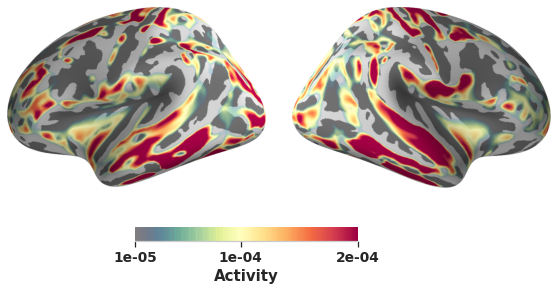

In [54]:
#plot source estimate of alert conditions
axplot, fig = brainplot(stc_plotfsavgcond1,clim=dict(kind='value', lims=[1e-5, 1e-4, 2e-4]),
                  title = 'Alert source space patterns ('+ 
                        str(crop_tmin) + ' - ' + str(crop_tmax) +' s)')
fig.savefig(fig_dir + "Alert_sourceregresion_clusters_clust_1.png", bbox_inches = 'tight', pad_inches = 0.1)

/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


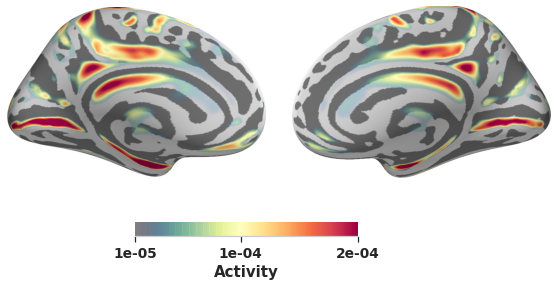

In [55]:
axplot, fig = brainplot(stc_plotfsavgcond1,clim=dict(kind='value', lims=[1e-5, 1e-4, 2e-4]),
                  title = 'Alert source space patterns ('+ str(crop_tmin) + ' - ' + str(crop_tmax) +' s)',
                       plotview = 'Inner')

/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


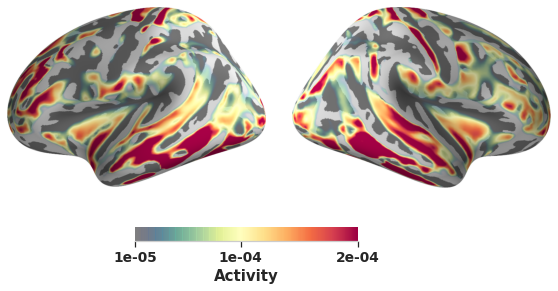

In [56]:
#plot source estimate of drowsy conditions
axplot, fig = brainplot(stc_plotfsavgcond2,clim=dict(kind='value', lims=[1e-5, 1e-4, 2e-4]),
                  title = 'Drowsy source space patterns ('+ 
                        str(crop_tmin) + ' - ' + str(crop_tmax) +' s)')
fig.savefig(fig_dir + "Drowsy_sourceregresion_clusters_clust_1.png", bbox_inches = 'tight', pad_inches = 0.1)

/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


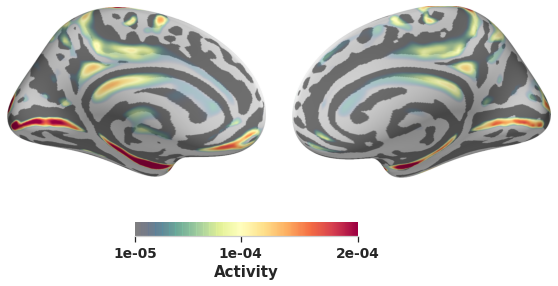

In [57]:
axplot, fig = brainplot(stc_plotfsavgcond2,clim=dict(kind='value', lims=[1e-5, 1e-4, 2e-4]),
                  title = 'Drowsy source space patterns ('+ str(crop_tmin) + ' - ' + str(crop_tmax) +' s)',
                       plotview = 'Inner')

In [58]:
X = np.transpose(X, [2, 1, 0])
X.shape

(30, 5, 20484)

In [59]:
# one tailed t-value verified with.. https://goodcalculators.com/student-t-value-calculator/ 
# (df = 29, alpha = 0.05) -> t = 1.69

In [60]:
p_threshold = 0.05
t_threshold = -stats.distributions.t.ppf(p_threshold, n_subjects - 1)
#positive cluster..
T_obs, clusters, cluster_p_values, H0 = clu = \
                                            spatio_temporal_cluster_1samp_test(X,
                                                                               n_jobs=1,
                                                                               tail=1,n_permutations=2**12,
                                                                               seed = 1234,
                                                                               spatial_exclude = spatial_exclude,
                                                                               connectivity=connectivity,
                                                                               threshold=t_threshold)

stat_fun(H1): min=-4.914522 max=4.726793
Running initial clustering
Found 260 clusters
Permuting 4095 times...
[............................................................] 100.00%  |
Computing cluster p-values
Done.


In [61]:
good_cluster_inds = np.where(cluster_p_values < p_threshold)[0]

In [62]:
for ii, cluster_ind in enumerate(good_cluster_inds):
        v_inds = clusters[cluster_ind][1]
        t_inds = clusters[cluster_ind][0]
        print('Cluster#',str(ii+1), 'from: ', round(np.min(np.unique(stc_cond1[0].times[t_inds])),2), 
              ' to: ', round(np.max(np.unique(stc_cond1[0].times[t_inds])),2))

Cluster# 1 from:  0.15  to:  0.35


In [63]:
tstep = stc_cond1[0].tstep
fsave_vertices = fsaverage_vertices

#    Now let's build a convenient representation of each cluster, where each
#    cluster becomes a "time point" in the SourceEstimate
stc_all_cluster_vis = summarize_clusters_stc(clu, tstep=tstep,vertices=fsave_vertices,subject='fsaverage')

In [64]:
stc_all_cluster_vis

<SourceEstimate  |  20484 vertices, subject : fsaverage, tmin : 0.0 (ms), tmax : 50.0 (ms), tstep : 50.0 (ms), data shape : (20484, 2)>

/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


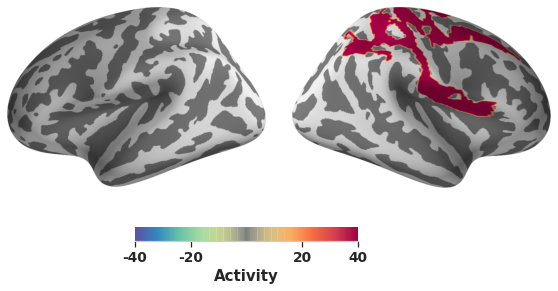

In [67]:
#plot source estimate of awake-drowsy conditions
axplot, fig  = brainplot(stc_all_cluster_vis,clim=dict(kind='value', pos_lims=[0, 20, 40]),
                         title = 'Regression Cluster patterns ('+ 
                        str(crop_tmin) + ' - ' + str(crop_tmax) +' s)')
fig.savefig(fig_dir + "AlertvsDrowsy_sourceregression_clusters_clust_1.png", bbox_inches = 'tight',
            pad_inches = 0.1)

In [68]:
#The mapped times are as follows
#       ['-0.15', '-0.10', '-0.05', '0.00', '0.05', '0.10', '0.15', '0.20',
#        '0.25',  '0.30',  '0.35',  '0.40', '0.45', '0.50', '0.55', '0.60',
#        '0.65',  '0.70',  '0.75',  '0.80']

In [69]:
#The actual times are as follows
#array([-0.175, -0.125, -0.075, -0.025,  0.025,  0.075,  0.125,  0.175,
#        0.225,  0.275,  0.325,  0.375,  0.425,  0.475,  0.525,  0.575,
#        0.625,  0.675,  0.725,  0.775])

###  Cluster#2 (0.175 - 0.325 sec)

In [70]:
crop_tmin = 0.20  #0.175
crop_tmax = 0.35 #0.325

In [71]:
stc_plotfsavgcond1, stc_plotfsavgcond2, n_subjects, stc_cond1, stc_cond2, X = \
                    estimateclusters(crop_tmin, crop_tmax)

cluster time periods are: [0.2  0.25 0.3  0.35]
Morphing data.
Cond1 data:  (20484, 4)
Cond2 data:  (20484, 4)


/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


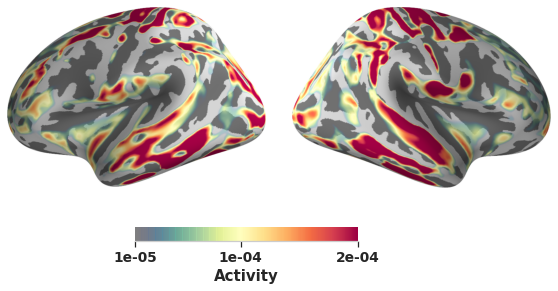

In [72]:
#plot source estimate of alert conditions
axplot, fig = brainplot(stc_plotfsavgcond1,clim=dict(kind='value', lims=[1e-5, 1e-4, 2e-4]),
                  title = 'Alert source space patterns ('+ 
                        str(crop_tmin) + ' - ' + str(crop_tmax) +' s)')
fig.savefig(fig_dir + "Alert_sourceregresion_clusters_clust_2.png", bbox_inches = 'tight', pad_inches = 0.1)

/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


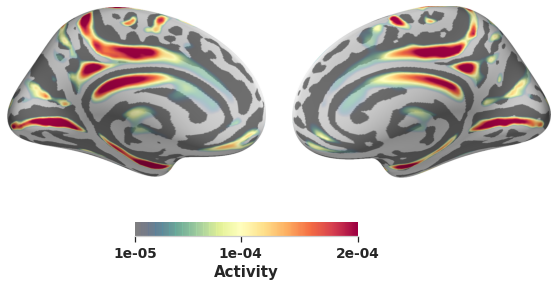

In [73]:
axplot, fig = brainplot(stc_plotfsavgcond1,clim=dict(kind='value', lims=[1e-5, 1e-4, 2e-4]),
                  title = 'Alert source space patterns ('+str(crop_tmin) + ' - ' + str(crop_tmax) +' s)',
                       plotview = 'Inner')

/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


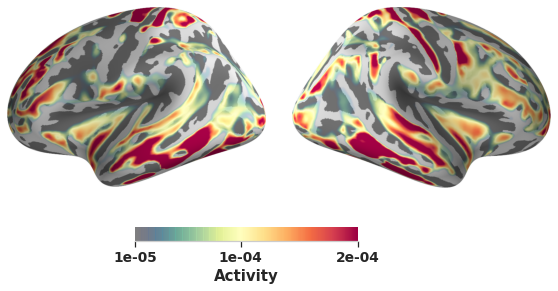

In [74]:
#plot source estimate of drowsy conditions
axplot, fig = brainplot(stc_plotfsavgcond2,clim=dict(kind='value', lims=[1e-5, 1e-4, 2e-4]),
                  title = 'Drowsy source space patterns ('+ 
                        str(crop_tmin) + ' - ' + str(crop_tmax) +' s)')
fig.savefig(fig_dir + "Drowsy_sourceregresion_clusters_clust_2.png", bbox_inches = 'tight', pad_inches = 0.1)

/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


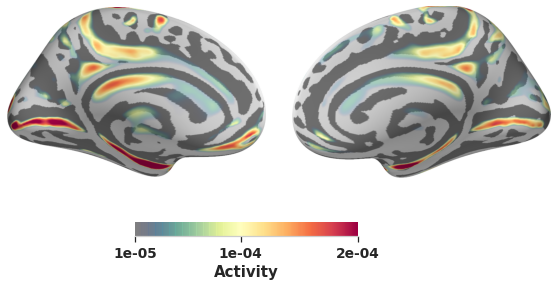

In [75]:
#plot source estimate of drowsy conditions
axplot, fig = brainplot(stc_plotfsavgcond2,clim=dict(kind='value', lims=[1e-5, 1e-4, 2e-4]),
                  title = 'Drowsy source space patterns ('+ str(crop_tmin) + ' - ' + str(crop_tmax) +' s)',
                       plotview = 'Inner')

In [76]:
X = np.transpose(X, [2, 1, 0])
X.shape

(30, 4, 20484)

In [77]:
p_threshold = 0.05
t_threshold = stats.distributions.t.ppf(p_threshold, n_subjects - 1)
#negative cluster..
T_obs, clusters, cluster_p_values, H0 = clu = \
                                            spatio_temporal_cluster_1samp_test(X,
                                                                               n_jobs=1,
                                                                               tail=-1,n_permutations=2**12,
                                                                               seed = 1234,
                                                                               spatial_exclude = spatial_exclude,
                                                                               connectivity=connectivity,
                                                                               threshold=t_threshold)

stat_fun(H1): min=-4.914522 max=4.726793
Running initial clustering
Found 196 clusters
Permuting 4095 times...
[............................................................] 100.00%  |
Computing cluster p-values
Done.


In [78]:
good_cluster_inds = np.where(cluster_p_values < p_threshold)[0]

In [79]:
for ii, cluster_ind in enumerate(good_cluster_inds):
        v_inds = clusters[cluster_ind][1]
        t_inds = clusters[cluster_ind][0]
        print('Cluster#',str(ii+1), 'from: ', round(np.min(np.unique(stc_cond1[0].times[t_inds])),2), 
              ' to: ', round(np.max(np.unique(stc_cond1[0].times[t_inds])),2))

Cluster# 1 from:  0.2  to:  0.35


In [80]:
tstep = stc_cond1[0].tstep
fsave_vertices = fsaverage_vertices

#    Now let's build a convenient representation of each cluster, where each
#    cluster becomes a "time point" in the SourceEstimate
stc_all_cluster_vis = summarize_clusters_stc(clu, tstep=tstep,vertices=fsave_vertices,subject='fsaverage')

In [81]:
stc_all_cluster_vis

<SourceEstimate  |  20484 vertices, subject : fsaverage, tmin : 0.0 (ms), tmax : 50.0 (ms), tstep : 50.0 (ms), data shape : (20484, 2)>

/home/srj34/jupyter-env/lib/python3.6/site-packages/mne/viz/_3d.py:2982: MatplotlibDeprecationWarning: Passing the cmap parameter of __init__() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  label=label, orientation=orientation)
/home/srj34/jupyter-env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


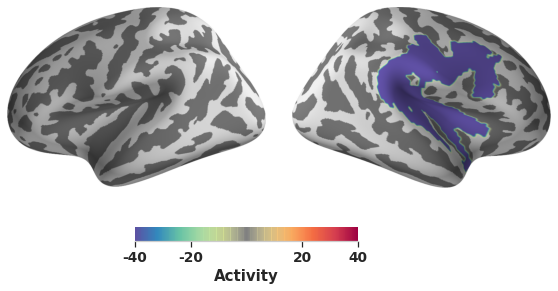

In [83]:
#plot source estimate of awake-drowsy conditions
axplot, fig  = brainplot(stc_all_cluster_vis,clim=dict(kind='value', pos_lims=[0, 20, 40]),
                         title = 'Late cluster source space ('+ 
                        str(crop_tmin) + ' - ' + str(crop_tmax) +' s)')
fig.savefig(fig_dir + "AlertvsDrowsy_sourceregression_clusters_clust_2.png", bbox_inches = 'tight',
            pad_inches = 0.1)